In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option('display.max_rows', 10)

## **Importing the dataset**

In [63]:
import os
files = os.listdir(r'C:\Users\mothi\Downloads\Uber datasets')[-6:]

In [64]:
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [65]:
path = r'C:\Users\mothi\Downloads\Uber datasets'

final_df = pd.DataFrame()

for file in files:
    raw_df = pd.read_csv(path+'/'+file, encoding='utf-8')
    final_df = pd.concat([raw_df, final_df])

In [66]:
uber_df=final_df.copy()

## **Basic information about the dataset**

In [67]:
uber_df['Date/Time']

0           9/1/2014 0:01:00
1           9/1/2014 0:01:00
2           9/1/2014 0:03:00
3           9/1/2014 0:06:00
4           9/1/2014 0:11:00
                 ...        
564511    4/30/2014 23:22:00
564512    4/30/2014 23:26:00
564513    4/30/2014 23:31:00
564514    4/30/2014 23:32:00
564515    4/30/2014 23:48:00
Name: Date/Time, Length: 4534327, dtype: object

In [68]:
uber_df.shape

(4534327, 4)

In [69]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4534327 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date/Time  object 
 1   Lat        float64
 2   Lon        float64
 3   Base       object 
dtypes: float64(2), object(2)
memory usage: 173.0+ MB


In [70]:
uber_df.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [71]:
uber_df.describe()

,Lat,Lon
count,4.534327e+06,4.534327e+06
mean,4.073926e+01,-7.397302e+01
std,3.994991e-02,5.726670e-02
min,3.965690e+01,-7.492900e+01
25%,4.072110e+01,-7.399650e+01
50%,4.074220e+01,-7.398340e+01
75%,4.076100e+01,-7.396530e+01
max,4.211660e+01,-7.206660e+01


In [72]:
uber_df['Date/Time'] = pd.to_datetime(uber_df['Date/Time'], format = '%m/%d/%Y %H:%M:%S')

In [73]:
uber_df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

## Creating Month, Weekday, Day, Hour and Minute columns

In [74]:
uber_df['Month'] = uber_df['Date/Time'].dt.month
uber_df['Month Name'] = uber_df['Date/Time'].dt.month_name(locale = 'English')
uber_df['Day'] = uber_df['Date/Time'].dt.day
uber_df['Weekday'] = uber_df['Date/Time'].dt.day_name()
uber_df['Hour'] = uber_df['Date/Time'].dt.hour
uber_df['Minute'] = uber_df['Date/Time'].dt.minute

In [75]:
uber_df.head()

,Date/Time,Lat,Lon,Base,Month,Month Name,Day,Weekday,Hour,Minute
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,9,September,1,Monday,0,1
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,9,September,1,Monday,0,1
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,9,September,1,Monday,0,3
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,9,September,1,Monday,0,6
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,9,September,1,Monday,0,11


In [76]:
uber_df['Month Name'].unique()

array(['September', 'May', 'June', 'July', 'August', 'April'],
      dtype=object)

## Checking for Null Records in the datset

In [77]:
uber_df.isnull().any()

Date/Time     False
Lat           False
Lon           False
Base          False
Month         False
Month Name    False
Day           False
Weekday       False
Hour          False
Minute        False
dtype: bool

In [78]:
uber_df.isnull().sum()

Date/Time     0
Lat           0
Lon           0
Base          0
Month         0
Month Name    0
Day           0
Weekday       0
Hour          0
Minute        0
dtype: int64

## Sorting the dataset by Date Column

In [23]:
uber_df.sort_values(by= 'Date/Time', inplace = False)

,Date/Time,Lat,Lon,Base,Month,Month Name,Day,Weekday,Hour,Minute
326800,2014-04-01 00:00:00,40.7215,-73.9952,B02682,4,April,1,Tuesday,0,0
35536,2014-04-01 00:00:00,40.7637,-73.9600,B02598,4,April,1,Tuesday,0,0
35537,2014-04-01 00:00:00,40.7188,-73.9863,B02598,4,April,1,Tuesday,0,0
218799,2014-04-01 00:01:00,40.7355,-73.9966,B02617,4,April,1,Tuesday,0,1
326801,2014-04-01 00:02:00,40.7184,-73.9601,B02682,4,April,1,Tuesday,0,2
...,...,...,...,...,...,...,...,...,...,...
652663,2014-09-30 22:59:00,40.7505,-74.0030,B02617,9,September,30,Tuesday,22,59
652664,2014-09-30 22:59:00,40.7424,-73.9827,B02617,9,September,30,Tuesday,22,59
274967,2014-09-30 22:59:00,40.7335,-73.9898,B02598,9,September,30,Tuesday,22,59
34369,2014-09-30 22:59:00,40.7257,-73.9921,B02512,9,September,30,Tuesday,22,59


# Working on Data-Driven Questions

## Q1. Analysis of Journeys by Weekdays?

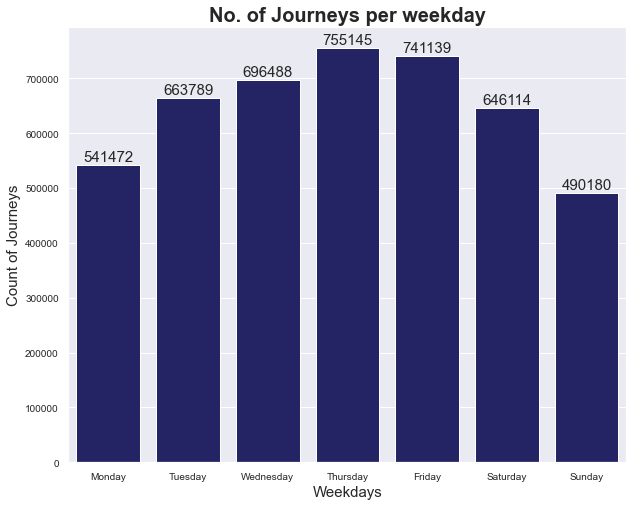

In [141]:
plt.figure(figsize = (10,8))
plots = sns.countplot (x = uber_df['Weekday'], color = 'midnightblue')

plt.xlabel('Weekdays', fontsize = 15)
plt.ylabel('Count of Journeys', fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('No. of Journeys per weekday', fontsize = 20, fontweight = 'bold')

for bar in plots.patches:
    plots.annotate(format(bar.get_height()), (bar.get_x() + bar.get_width()/2, 
                bar.get_height()), ha = 'center', va = 'center', size = 15,
                xytext = (0, 8), textcoords = 'offset points')

plt.show()

## Q2. Analysis of Journey by Hours for each Month?

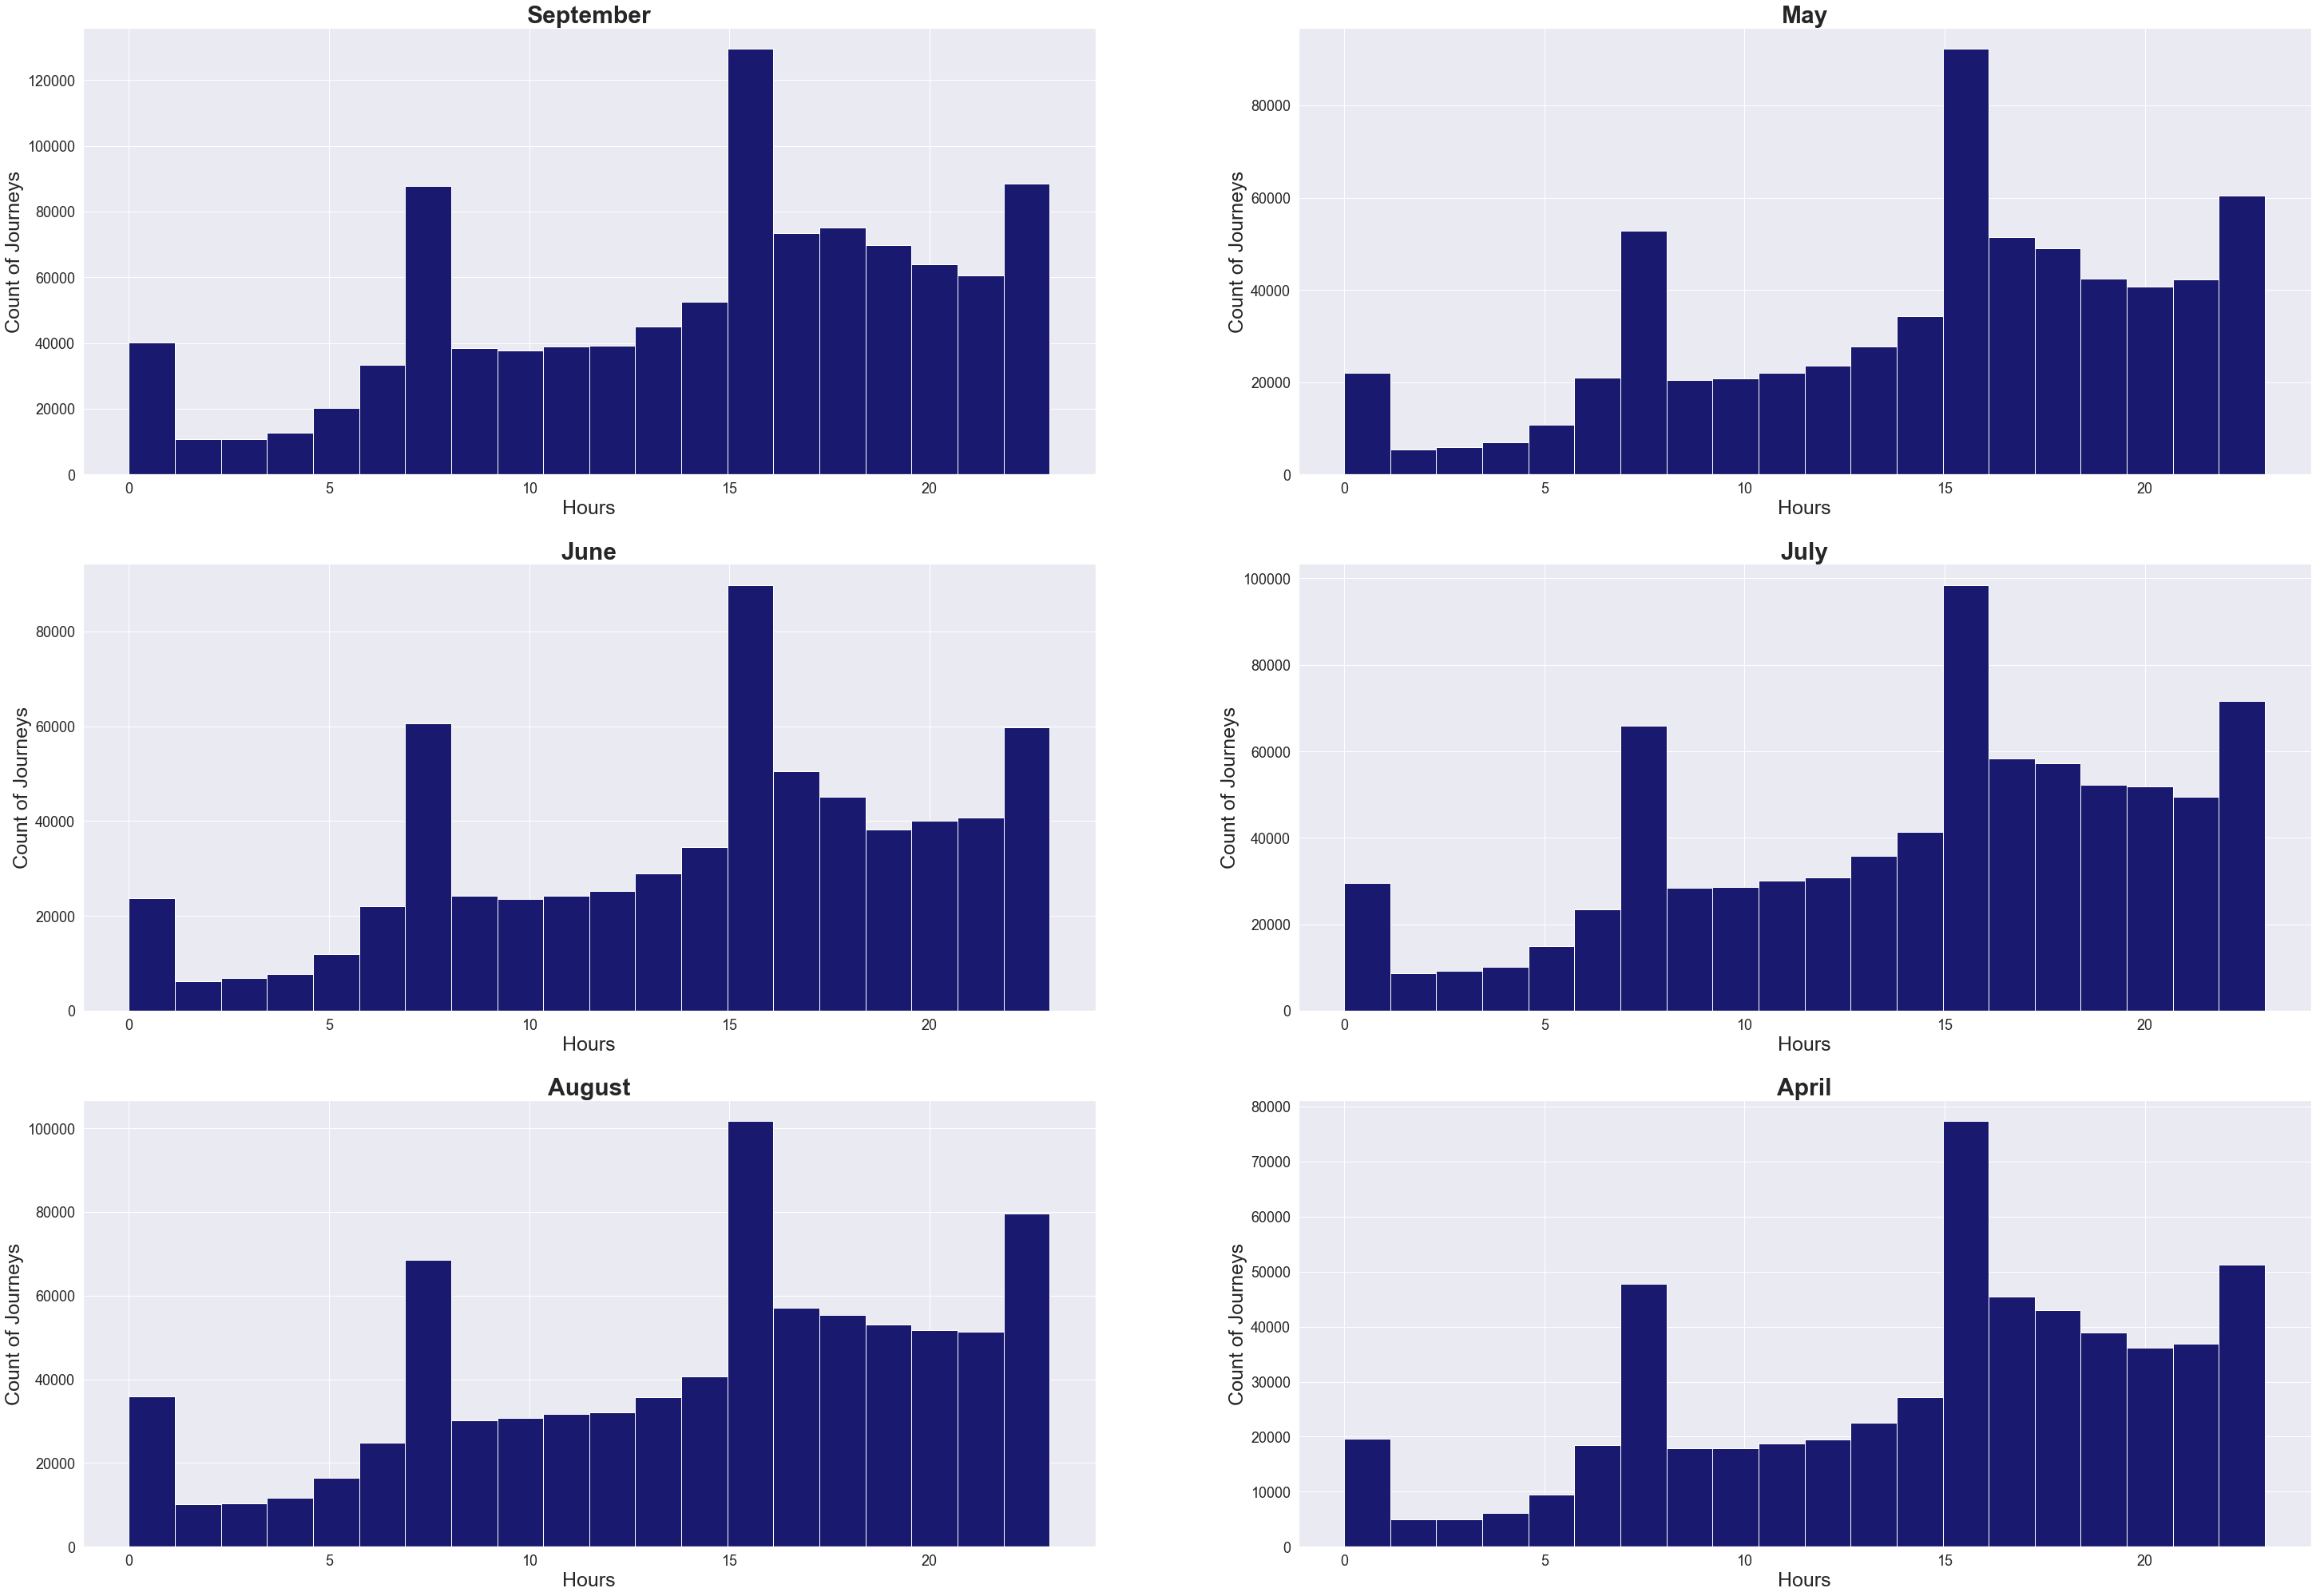

In [80]:
plt.figure(figsize=(50, 35))

for index,month in enumerate(uber_df['Month Name'].unique()):
    plt.subplot(3, 2, index + 1)
    uber_df[uber_df['Month Name'] == month]['Hour'].hist(bins=20, color='midnightblue')
    plt.xlabel('Hours', fontsize = 25)
    plt.ylabel('Count of Journeys', fontsize = 25)
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    plt.title(month, fontweight = 'bold', fontsize = 30)

plt.show()

## Q3. Analysis of journey by Months?

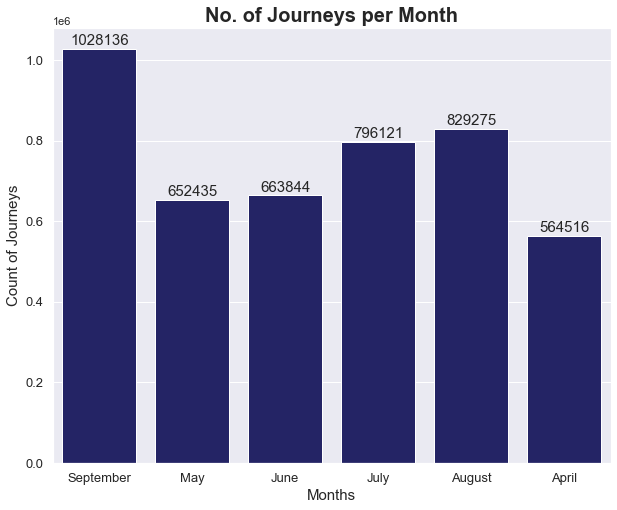

In [142]:
plt.figure(figsize = (10, 8))

plot = sns.countplot(x=uber_df['Month Name'], color='midnightblue')

for bar in plot.patches:
    plot.annotate(format(bar.get_height()), (bar.get_x() + bar.get_width()/2,
                bar.get_height()), va = 'center', ha = 'center', xytext = (0,8),
                  size = 15, textcoords = 'offset points')
    
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Count of Journeys', fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('No. of Journeys per Month', fontsize = 20, fontweight = 'bold')

plt.show()

## Q4. Analysis of Journey by day of months?

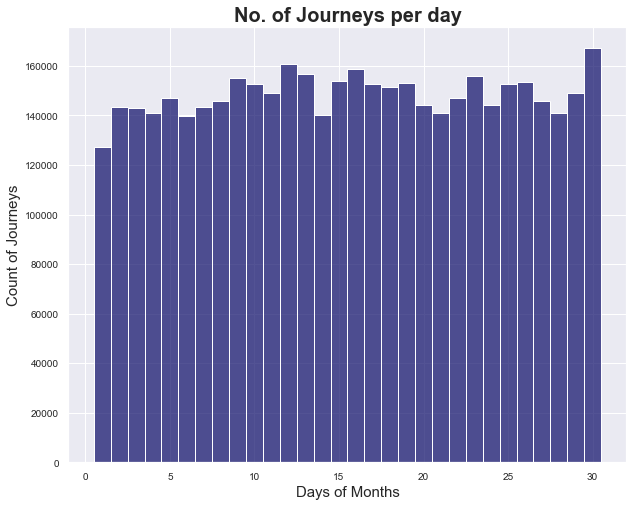

In [82]:
plt.figure(figsize = (10,8))

plots = sns.histplot(x = uber_df['Day'], bins = 30, color = 'midnightblue', binwidth = 1, binrange = (0.5,30.5))

plt.title('No. of Journeys per day', fontsize = 20, fontweight = 'bold')
plt.xlabel('Days of Months', fontsize = 15)
plt.ylabel('Count of Journeys', fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

## Q5. Analysis of Journey of Day of months for each month?

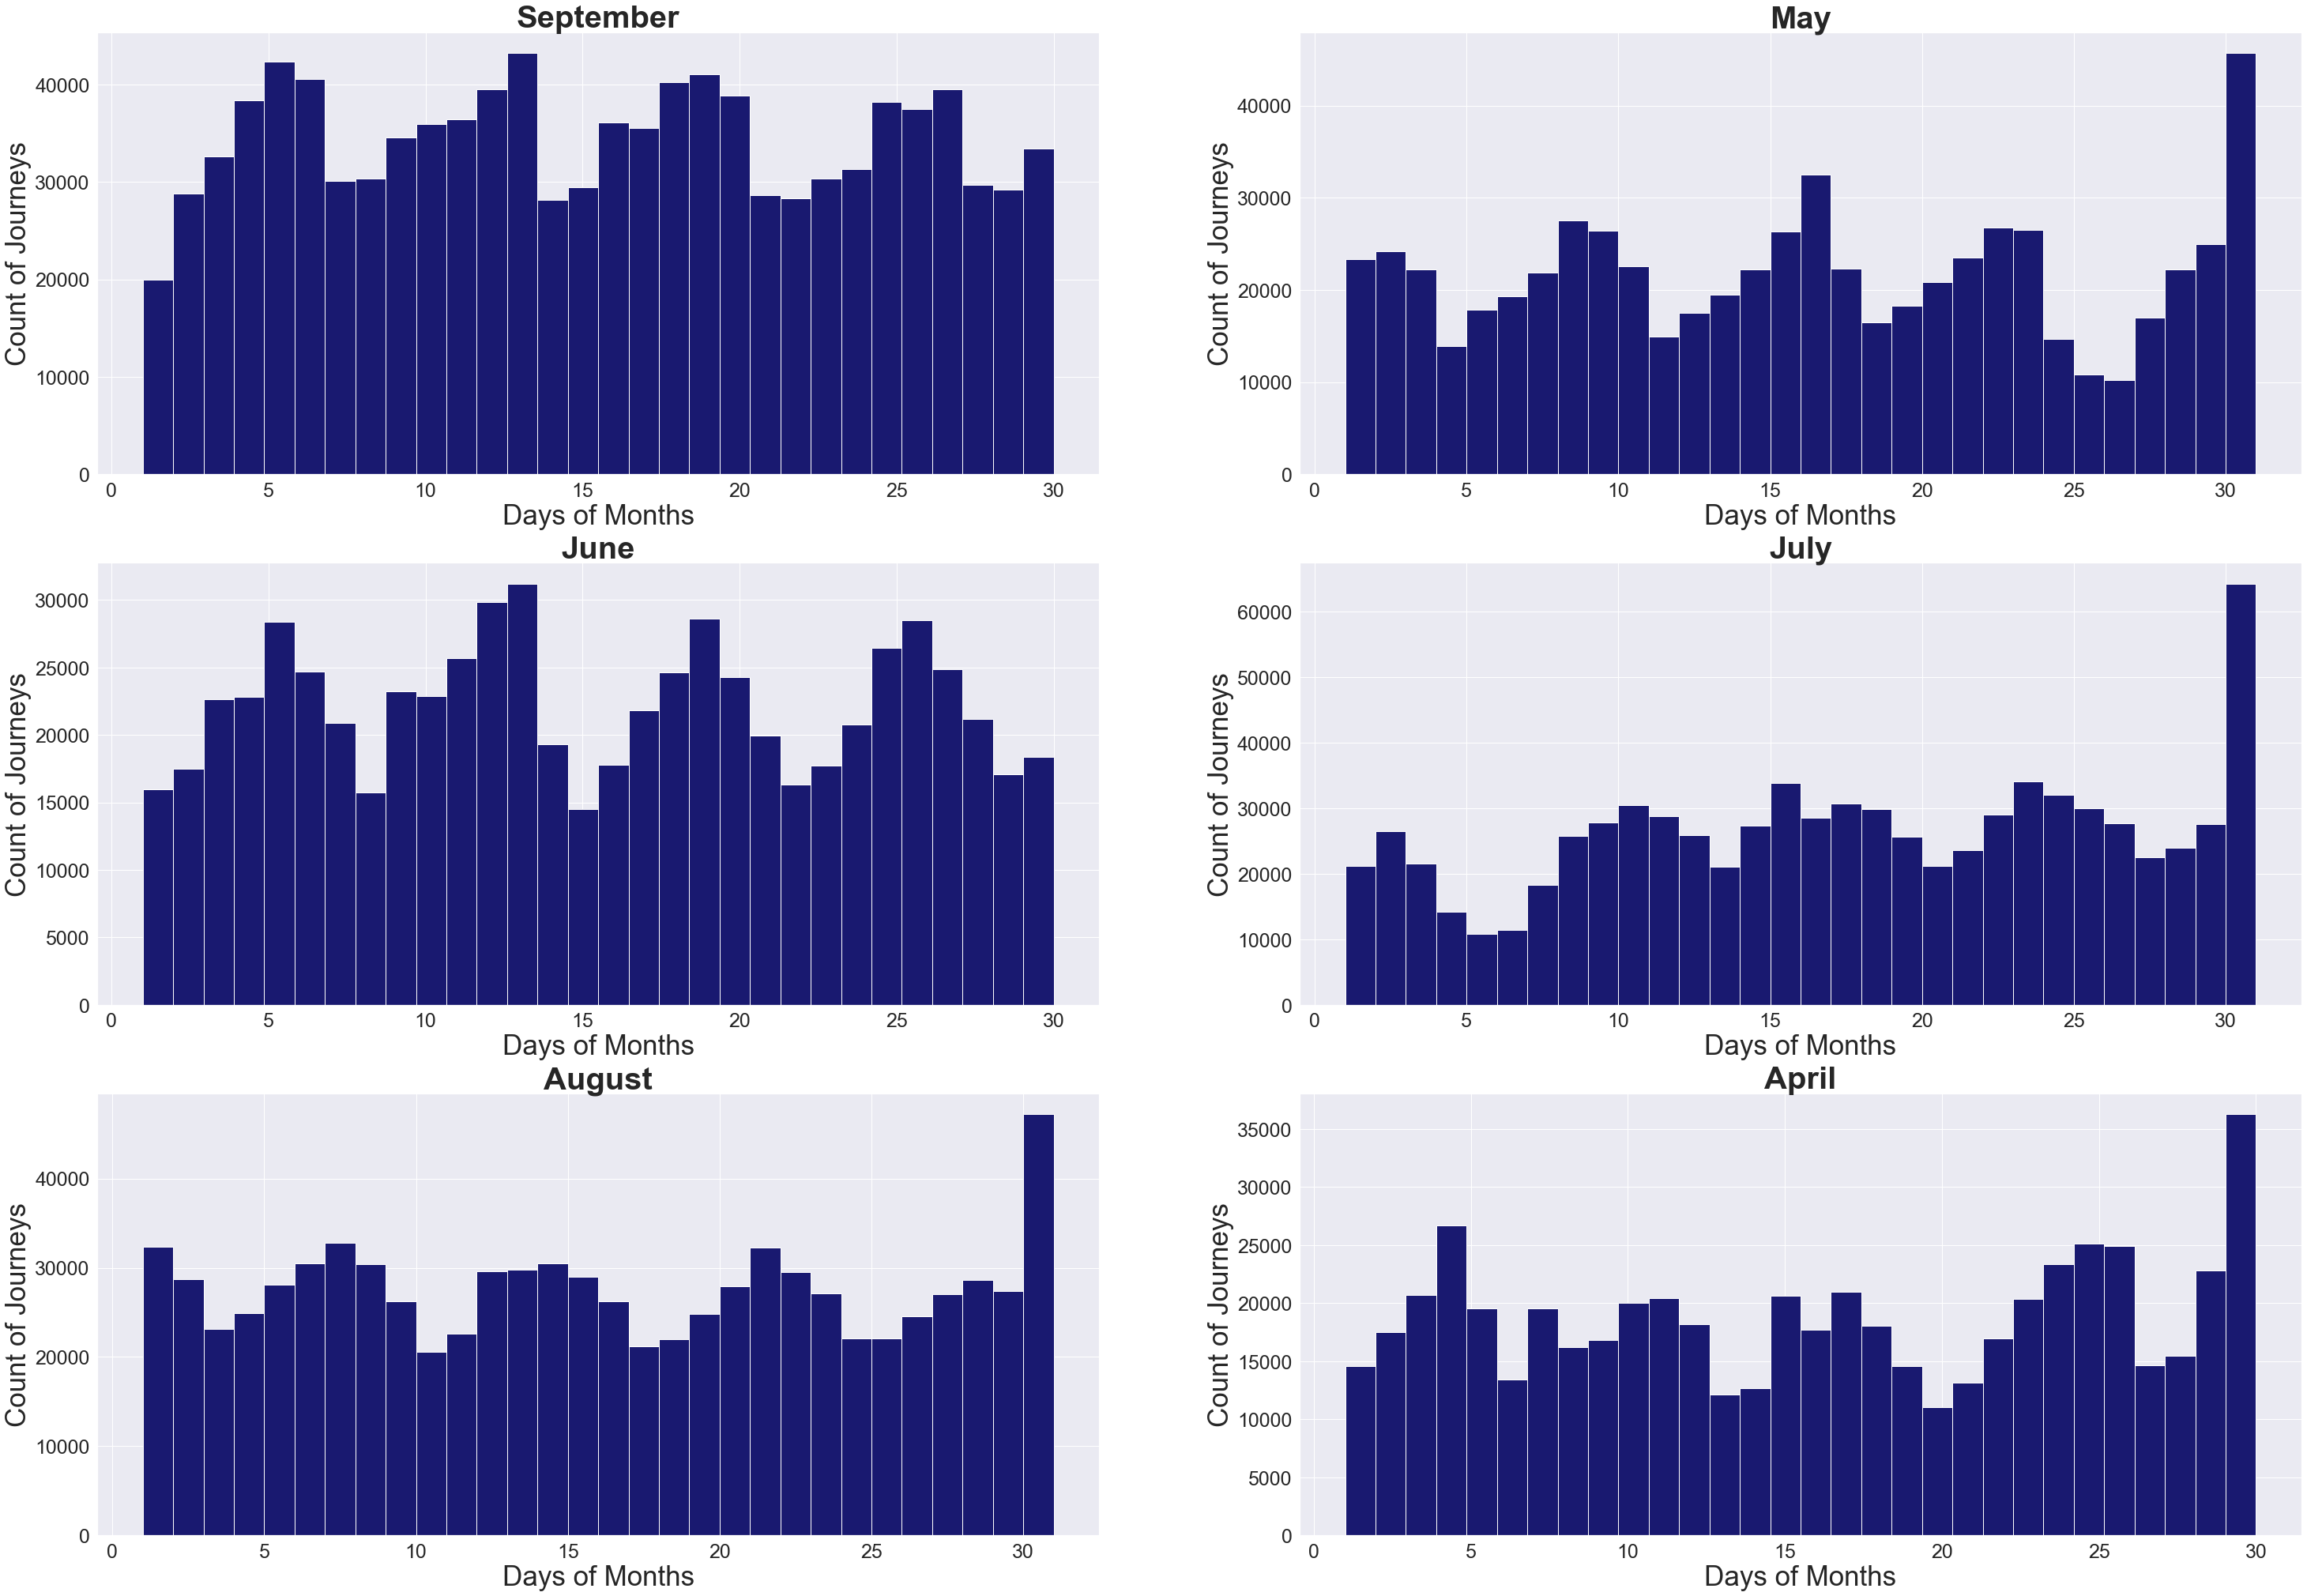

In [83]:
plt.figure(figsize = (50, 35))

for index, month in enumerate(uber_df['Month Name'].unique()):
    plt.subplot(3, 2, index+1)
    uber_df[uber_df['Month Name'] == month]['Day'].hist(bins = 30, color = 'midnightblue')
    plt.xlabel('Days of Months', fontsize = 35)
    plt.ylabel('Count of Journeys', fontsize = 35)
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    plt.title(month, fontsize = 40, fontweight = 'bold')
    
plt.show()

##  Q6. Rush Hour Analysis per lattitude for each weekday?

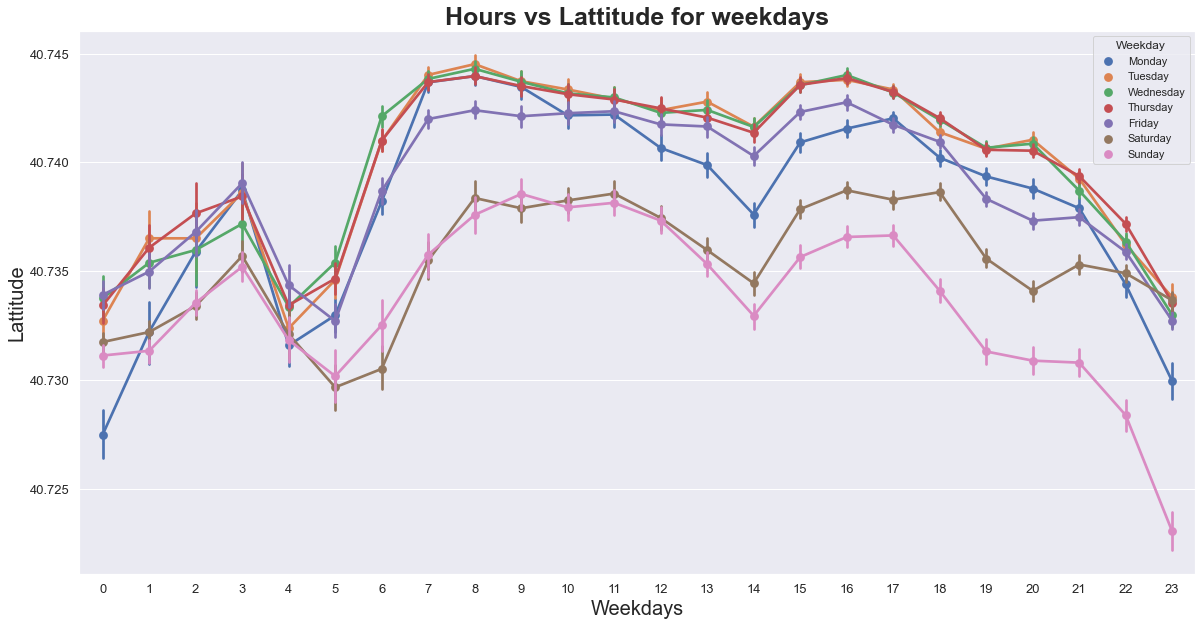

In [91]:
plt.figure(figsize = (20,10))

sns.pointplot(x = uber_df['Hour'], y = uber_df['Lat'], hue = uber_df['Weekday'])

plt.title('Hours vs Lattitude for weekdays', fontweight = 'bold', fontsize = 25)
plt.xlabel('Weekdays', fontsize = 20)
plt.ylabel('Lattitude', fontsize = 20)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.show()

## Q7. Which base number gets popular each month?

In [99]:
base_df = uber_df.groupby(['Base', 'Month', 'Month Name'])['Date/Time'].count().reset_index()
pd.set_option('display.max_rows', None)
base_df

,Base,Month,Month Name,Date/Time
0,B02512,4,April,35536
1,B02512,5,May,36765
2,B02512,6,June,32509
3,B02512,7,July,35021
4,B02512,8,August,31472
5,B02512,9,September,34370
6,B02598,4,April,183263
7,B02598,5,May,260549
8,B02598,6,June,242975
9,B02598,7,July,245597


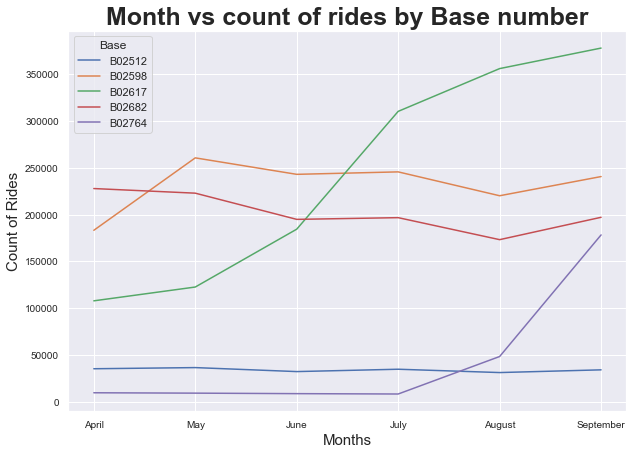

In [105]:
plt.figure(figsize = (10, 7))

sns.lineplot(x = base_df['Month Name'], y = base_df['Date/Time'], hue = base_df['Base'])

plt.xlabel('Months', fontsize = 15)
plt.ylabel('Count of Rides', fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Month vs count of rides by Base number', fontsize = 25, fontweight = 'bold')+
+
plt.legend

plt.show()

In [128]:
def heatmap(col1, col2):
    plt.figure(figsize = (10, 8))
    return sns.heatmap(uber_df.groupby([col1, col2])['Date/Time'].count().unstack(), cmap = 'vlag')

## Heatmap between weekday and Hour column

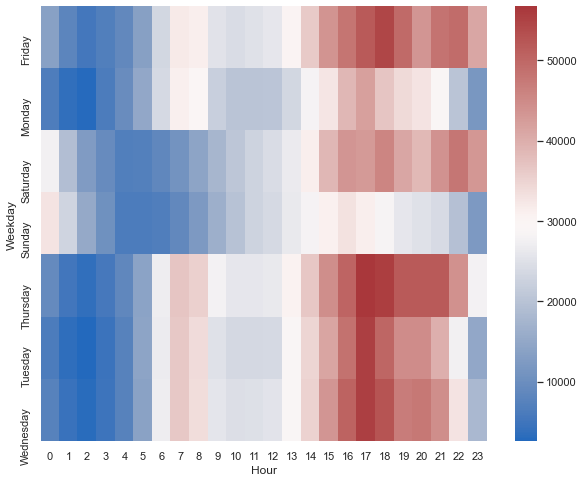

In [137]:
heatmap('Weekday', 'Hour')
plt.show()

## Heatmap betweem Day and Hour column

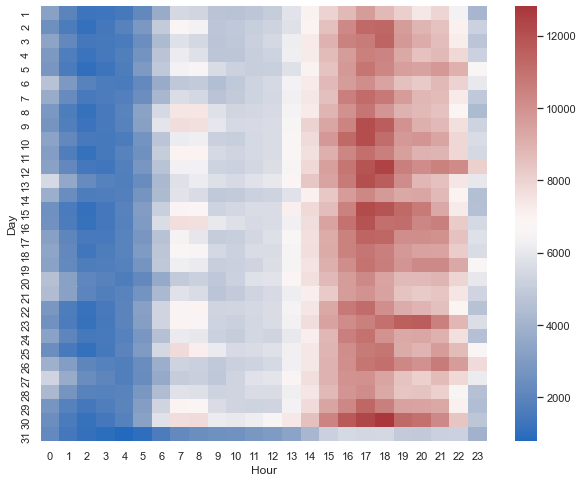

In [138]:
heatmap('Day', 'Hour')
plt.show()

## Heatmap between Month and Day column

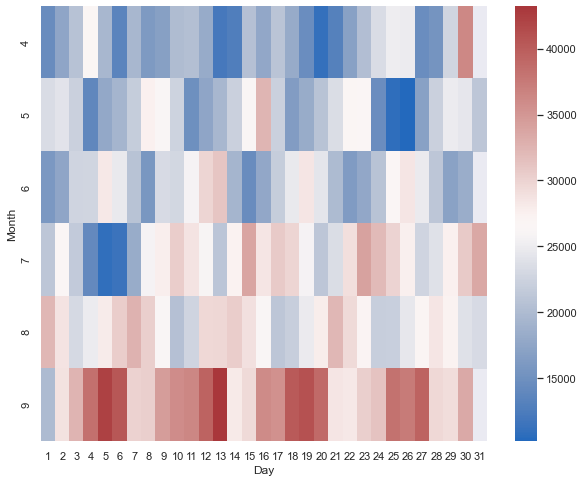

In [139]:
heatmap('Month', 'Day')
plt.show()

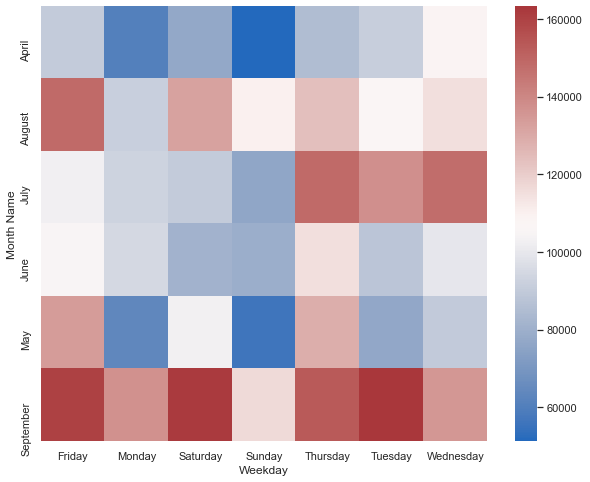

In [140]:
heatmap('Month Name', 'Weekday')
plt.show()